### ML Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

- data__Îç∞Ïù¥ÌÑ∞Ï†ÑÏ≤òÎ¶¨ÌÜµÌï©.ipynb ÏïÑÎûò ÏΩîÎìúÏóêÏÑú Îã¥Îãπ Ïπ¥ÌÖåÍ≥†Î¶¨Ïùò Î≥ÄÍ≤ΩÏÇ¨Ìï≠ ÏûàÏùÑÏãú ÏàòÏ†ïÌï¥ÏÑú ÏÇ¨Ïö©

In [1]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨
import os
import json
import pandas as pd
import numpy as np
from pathlib import Path

# ÌôòÍ≤ΩÏÑ§Ï†ï
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)      # Ìñâ Ï†ÑÏ≤¥ ÌëúÏãú
pd.set_option('display.max_columns', None)  # Ïó¥ Ï†ÑÏ≤¥ ÌëúÏãú
pd.set_option('display.width', None)        # Í∞ÄÎ°úÌè≠ ÏûêÎèô ÎßûÏ∂§
pd.set_option('display.max_colwidth', None) # ÏÖÄ ÏïàÏùò ÌÖçÏä§Ìä∏ ÏÉùÎûµ Î∞©ÏßÄ
pd.set_option('display.float_format', '{:.6f}'.format)

# Í≤ΩÎ°ú ÏÑ§Ï†ï
ROOT_DIR = Path("").resolve().parent.parent

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú
DATA_DIR = ROOT_DIR / "data"
DATA_PATH = DATA_DIR / "analy_data.csv"
SAVE_FILE = "preprocessed_v1.csv"

# JSON Ïª¨Îüº Í¥ÄÎ¶¨ ÌååÏùº Î°úÎìú
with open("columns.json", "r", encoding="utf-8") as f:
    columns_dict = json.load(f)

# Í≥µÌÜµ Ìï®Ïàò 
def get_columns(*categories):
    """columns.jsonÏùò Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ use=y Ïª¨Îüº Ï∂îÏ∂ú"""
    selected = []
    for cat in categories:
        for col, meta in columns_dict[cat].items():
            if meta.get("use", "n") == "y": 
                selected.append(col)
    
    if "churn" not in selected:
        selected.append("churn")

    if "exmprs_no" not in selected:
        selected.append("exmprs_no")

    return selected

def rename_to_kor(df):
    """columns.jsonÏùò nameÏúºÎ°ú ÌïúÍ∏Ä Ïª¨ÎüºÎ™Ö Îß§Ìïë"""
    rename_map = {
        col: meta["name"]
        for cat in columns_dict.values()
        for col, meta in cat.items()
        if col in df.columns
    }
    return df.rename(columns=rename_map)

# 1. Í∏∞Î≥∏Ï†ïÎ≥¥ + Í∞ÄÍµ¨Ï°∞ÏÇ¨ 
def preprocess_basic_house(data_path):
    cols = get_columns("Í∏∞Î≥∏Ï†ïÎ≥¥", "Í∞ÄÍµ¨Ï°∞ÏÇ¨")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    if "CTPRVN_CODE" in df.columns:
        df['CTPRVN_CODE'] = df['CTPRVN_CODE'].apply(lambda x: x.split("'")[1])
    
    if "SPOT_NO" in df.columns:
        df['SPOT_NO'] = df['SPOT_NO'].apply(lambda x: x.split("'")[1])
    
    if "sex" in df.columns:
        df['sex'] = df['sex'].apply(lambda x: 1 if x == 1 else 2).astype(str)

    # NaN Î≥ÄÍ≤Ω
    for col in ["fma_04z1", "nue_01z1", "fma_27z1", "fma_26z1"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["fma_13z1", "fma_14z1"]:
        if col in df.columns:
            df.loc[df[col] >= 77777, col] = np.nan

    for col in ["fma_24z2"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    return df

# 2. ÏãùÏÉùÌôú + ÎπÑÎßåÎ∞èÏ≤¥Ï§ëÏ°∞Ï†à + Íµ¨Í∞ïÍ±¥Í∞ï
def preprocess_diet_obesity_oral(data_path):
    cols = get_columns("ÏãùÏÉùÌôú", "ÎπÑÎßåÎ∞èÏ≤¥Ï§ëÏ°∞Ï†à", "Íµ¨Í∞ïÍ±¥Í∞ï")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    # NaN Î≥ÄÍ≤Ω
    for col in ["nua_01z2", "nuc_02z1", "nuc_03z1", "obb_02a1", "obb_02b1", "obb_02d1", "ora_01z1", "orb_01z1", "ord_01d2", "ord_05z1", "ord_01f3"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["ore_03z2"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    return df

# 3. ÏùåÏ£º + Ïã†Ï≤¥ÌôúÎèô
def preprocess_drink_physical(data_path):
    cols = get_columns("ÏùåÏ£º", "Ïã†Ï≤¥ÌôúÎèô")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    # Í∞í Î≥ÄÍ≤Ω
    if "drb_01z3" in df.columns:
        df["drb_01z3"] = df["drb_01z3"].replace(8, 1)

    if "drb_03z1" in df.columns:
        df["drb_03z1"] = df["drb_03z1"].replace(8, -1)

    # NaN Î≥ÄÍ≤Ω 
    for col in ["drb_01z3", "drb_03z1", "drg_01z3", "pha_11z1", "drb_04z1", "drb_05z1"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["pha_04z1", "pha_07z1", "phb_01z1"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    return df

# 4. Ï†ïÏã†Í±¥Í∞ï + Î≥¥Í±¥Ïù¥Ïö©
def preprocess_mental_health(data_path):
    cols = get_columns("Ï†ïÏã†Í±¥Í∞ï", "Î≥¥Í±¥Ïù¥Ïö©")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    # NaN Î≥ÄÍ≤Ω 
    for col in ["mta_01z1", "mta_02z1", "mtc_08z1", "mtc_12c1", "mtc_12h1", "mtj_05z2", "mtj_10z1", "mtj_11z1"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["edit_mtc_03z1"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    return df

# 5. Í±¥Í∞ïÌñâÌÉú + ÍµêÏú°Î∞èÍ≤ΩÏ†úÌôúÎèô
def preprocess_behavior_education(data_path):
    cols = get_columns("Í±¥Í∞ïÌñâÌÉú", "ÍµêÏú°Î∞èÍ≤ΩÏ†úÌôúÎèô")
    df = pd.read_csv(data_path, usecols=cols)

    # 'b' Î¨∏Ïûê Ï†ÑÏ≤òÎ¶¨
    if "exmprs_no" in df.columns:
        df['exmprs_no'] = df['exmprs_no'].apply(lambda x: x.split("'")[1])

    # NaN Î≥ÄÍ≤Ω
    for col in ["smf_01z1", "sma_01z1", "sma_03z2", "smb_09z1", "sma_36z1", "sma_37z1", "sma_08z1", "sma_12z2"\
                "smd_02z3", "smd_01z3", "smc_08z2", "smc_09z2", "smc_10z2", "sob_02z1", "soa_01z1", "soa_07z1", "sod_02z3"]:
        if col in df.columns:
            df.loc[df[col] >= 7, col] = np.nan

    for col in ["smb_02z1", "smb_05z1", "sma_11z2", "sob_01z1", "soa_06z2", "smb_12z1"]:
            if col in df.columns:
                df.loc[df[col] >= 77, col] = np.nan

    for col in ["smb_13z1", "smb_03z1", "smb_04z1", "smb_06z1", "smb_11z1"]:
            if col in df.columns:
                df.loc[df[col] >= 777, col] = np.nan
    return df

df_basic = preprocess_basic_house(DATA_PATH)
df_health = preprocess_diet_obesity_oral(DATA_PATH)
df_drink = preprocess_drink_physical(DATA_PATH)
df_mental = preprocess_mental_health(DATA_PATH)
df_behavior = preprocess_behavior_education(DATA_PATH)

dfs = [df_basic, df_health, df_drink, df_mental, df_behavior]
df_merge = dfs[0]
for temp in dfs[1:]:
    join_cols = [c for c in ["exmprs_no", "churn"] if c in df_merge.columns and c in temp.columns]
    if join_cols:
        df_merge = pd.merge(df_merge, temp, on=join_cols, how="outer")

print("Ïª¨Îüº ÏãùÎ≥Ñ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", df_merge.shape,'-2')
print(f"Í≤∞Ï∏°Ïπò ÎπÑÏú®: (ÌèâÍ∑†) {df_merge.isna().mean().mean() * 100:.2f}%")

#=========================
# Ï∂îÍ∞Ä Ï†ÑÏ≤òÎ¶¨
#=========================
# doyeon
#=========================
# 'ÏõîÍ∞Ñ Ìè≠Ïùå Í≤ΩÌóò(ÎÇ®)', 'ÏõîÍ∞Ñ Ìè≠Ïùå Í≤ΩÌóò(Ïó¨)' ['drb_04z1', 'drb_05z1'] -> 'ÏõîÍ∞Ñ Ìè≠Ïùå Í≤ΩÌóò' ['drb_binge_monthly'] ÌÜµÌï©
df_merge['sex'] = df_merge['sex']
df_merge['drb_binge_monthly'] = np.where(df_merge['sex'] == 1, df_merge['drb_04z1'], df_merge['drb_05z1'])
df_merge.drop(['drb_04z1', 'drb_05z1'], axis=1, inplace=True)

# Í∞íÎ≥ÄÍ≤Ω
df_merge['drb_binge_monthly'] = df_merge['drb_binge_monthly'].replace(8, -1)
df_merge.loc[df_merge['drb_binge_monthly'] >= 7, 'drb_binge_monthly'] = np.nan

# Î≤îÏ£ºÌòï ÏπºÎüº objectÌòï Î≥ÄÌôò
df_merge['dra_01z1'] = df_merge['dra_01z1'].astype('object')

#=========================
# soso
#=========================
# Ïó∞Î†πÎåÄ
df_merge['age_group'] = (df_merge['age'] // 10) * 10

# 1Ïù∏Í∞ÄÍµ¨
df_merge['is_single'] = np.where((df_merge['mbhld_co'] <= 1), 1, 0)

# ÏõîÍ∞ÑÏÜåÎìù Í∏∞Ï§Ä Í∞ÄÍµ¨ÏÜåÎìùÏª¨Îüº ÌÜµÌï©
df_merge['fma_14z1_add'] = df_merge['fma_14z1'] 
df_merge['fma_14z1_add'] = round(df_merge['fma_14z1_add'].fillna(df_merge['fma_13z1'] / 12))
df_merge['fma_14z1_log'] = np.log1p(df_merge['fma_14z1_add'])

bins = [0, 50, 100, 200, 300, 400, 500, 600, float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8]
df_merge['fma_14z1_group'] = pd.cut(df_merge['fma_14z1_add'], bins=bins, labels=labels, right=False)
df_merge['fma_14z1_group'] = np.where(df_merge['fma_14z1_group'].isna(), df_merge['fma_24z2'].astype(float), df_merge['fma_14z1_group'])

# ÏπòÎß§Í∞ÄÏ°±Ïó¨Î∂Ä
def get_dementia_case(row):
    if row['fma_27z1'] == 1 and row['fma_26z1'] == 1:
        return 1 # ÏπòÎß§Í∞ÄÏ°± ÏûàÏùå + Í∞ôÏù¥ Í±∞Ï£º
    elif row['fma_27z1'] == 1 and row['fma_26z1'] == 2:
        return 2 # ÏπòÎß§Í∞ÄÏ°± ÏûàÏùå + ÎπÑÍ±∞Ï£º
    elif row['fma_27z1'] == 2:
        return 3 # ÏπòÎß§Í∞ÄÏ°± ÏóÜÏùå
    else:
        return np.nan

df_merge['fma_dementia_case'] = df_merge.apply(get_dementia_case, axis=1)
df_merge.drop(['fma_13z1', 'fma_14z1','fma_27z1','fma_26z1'], axis=1, inplace=True)
print("Ï∂îÍ∞Ä Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", df_merge.shape ,'-2')
print("exmprs_no, wt_p ÌïÑÏöîÏãú ÌôúÏö©ÌïòÍ∏∞ ÏúÑÌï¥ Ìè¨Ìï®Ìï¥ÎÜìÏùå, Ï†úÏô∏ÌïòÍ≥† ÏÇ¨Ïö©")

Ïª¨Îüº ÏãùÎ≥Ñ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (89822, 75) -2
Í≤∞Ï∏°Ïπò ÎπÑÏú®: (ÌèâÍ∑†) 26.72%
Ï∂îÍ∞Ä Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (89822, 76) -2
exmprs_no, wt_p ÌïÑÏöîÏãú ÌôúÏö©ÌïòÍ∏∞ ÏúÑÌï¥ Ìè¨Ìï®Ìï¥ÎÜìÏùå, Ï†úÏô∏ÌïòÍ≥† ÏÇ¨Ïö©


In [28]:
# ÌïúÍ∏ÄÏª¨ÎüºÏúºÎ°ú ÌôïÏù∏Ìï† Ïãú ÏÇ¨Ïö©
df_merge_kor = rename_to_kor(df_merge)

---

In [3]:
df_merge

exmprs_no       age sex CTPRVN_CODE SPOT_NO       wt_p  \
0      2024111170001700102002201 31.000000   1          11   00102 380.470750   
1      2024111170001700102005901 37.000000   1          11   00102 380.470750   
2      2024111170001700102005902 36.000000   2          11   00102 376.403830   
3      2024111170001700102017001 36.000000   1          11   00102 380.470750   
4      2024111170001700191001801 64.000000   1          11   00191 119.450590   
...                          ...       ...  ..         ...     ...        ...   
89817  2024503970006201711015701 49.000000   1          50   01711  51.536450   
89818  2024503970006201711018701 77.000000   1          50   01711  30.934510   
89819  2024503970006201711021602 64.000000   1          50   01711  30.934510   
89820  2024503970006201711021603 40.000000   1          50   01711  51.536450   
89821  2024503970006201711033101 39.000000   1          50   01711  64.945120   

       mbhld_co  reside_adult_co  fma_04z1  fma_24z2  nue_01z1  churn  \
0      1.000000         1.000000  3.000000       NaN  1.000000      1   
1      3.000000         2.000000  3.000000       NaN  1.000000      0   
2      3.000000         2.000000  3.000000       NaN  1.000000      1   
3      2.000000         2.000000  3.000000       NaN  1.000000      0   
4      1.000000         1.000000  1.000000       NaN  4.000000      0   
...         ...              ...       ...       ...       ...    ...   
89817  1.000000         1.000000  3.000000       NaN  1.000000      1   
89818  5.000000         5.000000  3.000000       NaN  1.000000      1   
89819  3.000000         3.000000  3.000000       NaN  1.000000      1   
89820  3.000000         3.000000  3.000000       NaN  1.000000      0   
89821  2.000000         2.000000  3.000000       NaN  1.000000      1   

       nua_01z2  nuc_02z1  nuc_03z1  obb_02a1  obb_02b1  obb_02d1  ora_01z1  \
0      4.000000  2.000000       NaN  1.000000  2.000000  2.000000  3.000000   
1      2.000000  1.000000  1.000000       NaN       NaN       NaN  2.000000   
2      4.000000  2.000000       NaN  2.000000  2.000000  2.000000  2.000000   
3      4.000000  1.000000       NaN  1.000000  2.000000  2.000000  4.000000   
4      2.000000  2.000000       NaN       NaN       NaN       NaN  2.000000   
...         ...       ...       ...       ...       ...       ...       ...   
89817  4.000000  1.000000       NaN       NaN       NaN       NaN  4.000000   
89818  1.000000  1.000000       NaN       NaN       NaN       NaN  3.000000   
89819  1.000000  1.000000       NaN       NaN       NaN       NaN  2.000000   
89820  1.000000  2.000000       NaN  1.000000  1.000000  2.000000  3.000000   
89821  1.000000  1.000000  1.000000  1.000000  2.000000  2.000000  2.000000   

       orb_01z1  ord_01d2  ord_05z1  ord_01f3  ore_03z2 dra_01z1  drb_01z3  \
0      5.000000  1.000000       NaN  1.000000       NaN 1.000000  5.000000   
1      5.000000  2.000000  1.000000  1.000000       NaN 1.000000  4.000000   
2      5.000000  1.000000       NaN  1.000000       NaN 1.000000  5.000000   
3      3.000000  2.000000  1.000000  1.000000       NaN 1.000000  4.000000   
4      1.000000  1.000000       NaN  1.000000  3.000000 1.000000  4.000000   
...         ...       ...       ...       ...       ...      ...       ...   
89817  3.000000  1.000000       NaN  1.000000       NaN 1.000000  4.000000   
89818  5.000000  1.000000       NaN  1.000000       NaN 1.000000  1.000000   
89819  4.000000  1.000000       NaN  1.000000       NaN 1.000000  5.000000   
89820  5.000000  2.000000  2.000000  1.000000       NaN 1.000000  4.000000   
89821  5.000000  1.000000       NaN  1.000000       NaN 1.000000  2.000000   

       drb_03z1  drg_01z3  pha_04z1  pha_05z1  pha_06z1  pha_07z1  phb_01z1  \
0      3.000000  1.000000  2.000000  1.000000  0.000000  2.000000  5.000000   
1      4.000000  1.000000  3.000000  1.000000  0.000000  1.000000  7.000000   
2      4.000000  2.000000  0.000000 88.000000 88.0

### Î™®Îç∏Ïóê Îì§Ïñ¥Í∞ÄÎäî ÌîºÏ≤ò Ìï∏Îì§ÎßÅÌïòÍ≥† ÌÖåÏä§Ìä∏ Ìï¥Î≥¥Í∏∞ (Ìè¨Îß∑ Í≥†Ï†ï)

In [4]:
# ÏúÑ ÏΩîÎìú Ïã§Ìñâ Í≤∞Í≥º: df_merge
df = df_merge.copy()
df = df.drop(['exmprs_no','wt_p'], axis=1)
df.head()

age sex CTPRVN_CODE SPOT_NO  mbhld_co  reside_adult_co  fma_04z1  \
0 31.000000   1          11   00102  1.000000         1.000000  3.000000   
1 37.000000   1          11   00102  3.000000         2.000000  3.000000   
2 36.000000   2          11   00102  3.000000         2.000000  3.000000   
3 36.000000   1          11   00102  2.000000         2.000000  3.000000   
4 64.000000   1          11   00191  1.000000         1.000000  1.000000   

   fma_24z2  nue_01z1  churn  nua_01z2  nuc_02z1  nuc_03z1  obb_02a1  \
0       NaN  1.000000      1  4.000000  2.000000       NaN  1.000000   
1       NaN  1.000000      0  2.000000  1.000000  1.000000       NaN   
2       NaN  1.000000      1  4.000000  2.000000       NaN  2.000000   
3       NaN  1.000000      0  4.000000  1.000000       NaN  1.000000   
4       NaN  4.000000      0  2.000000  2.000000       NaN       NaN   

   obb_02b1  obb_02d1  ora_01z1  orb_01z1  ord_01d2  ord_05z1  ord_01f3  \
0  2.000000  2.000000  3.000000  5.000000  1.000000       NaN  1.000000   
1       NaN       NaN  2.000000  5.000000  2.000000  1.000000  1.000000   
2  2.000000  2.000000  2.000000  5.000000  1.000000       NaN  1.000000   
3  2.000000  2.000000  4.000000  3.000000  2.000000  1.000000  1.000000   
4       NaN       NaN  2.000000  1.000000  1.000000       NaN  1.000000   

   ore_03z2 dra_01z1  drb_01z3  drb_03z1  drg_01z3  pha_04z1  pha_05z1  \
0       NaN 1.000000  5.000000  3.000000  1.000000  2.000000  1.000000   
1       NaN 1.000000  4.000000  4.000000  1.000000  3.000000  1.000000   
2       NaN 1.000000  5.000000  4.000000  2.000000  0.000000 88.000000   
3       NaN 1.000000  4.000000  4.000000  1.000000  0.000000 88.000000   
4  3.000000 1.000000  4.000000  5.000000  1.000000  0.000000 88.000000   

   pha_06z1  pha_07z1  phb_01z1  pha_11z1  mta_01z1  mta_02z1  edit_mtc_03z1  \
0  0.000000  2.000000  5.000000  3.000000  2.000000  2.000000       0.000000   
1  0.000000  1.000000  7.000000  1.000000  4.000000       NaN       1.000000   
2 88.000000  4.000000  7.000000  1.000000  2.000000  2.000000       1.000000   
3 88.000000  3.000000  5.000000  1.000000  2.000000  2.000000       0.000000   
4 88.000000  0.000000  0.000000  1.000000  1.000000  1.000000      22.000000   

   mtc_08z1  mtc_12c1  mtc_12h1  mtj_05z2  mtj_10z1  mtj_11z1  smf_01z1  \
0       NaN  4.000000  2.000000       NaN       NaN       NaN  1.000000   
1       NaN  1.000000  1.000000       NaN       NaN       NaN  1.000000   
2       NaN  3.000000  1.000000       NaN       NaN       NaN  1.000000   
3       NaN  1.000000  1.000000       NaN       NaN       NaN  1.000000   
4  6.000000  4.000000  1.000000  1.000000  2.000000  2.000000  1.000000   

   sma_01z1   smb_01z1  smb_02z1  smb_03z1  smb_04z1  smb_05z1  smb_06z1  \
0  1.000000 888.000000       NaN       NaN  2.000000  0.000000  1.000000   
1  2.000000  15.000000       NaN       NaN       NaN       NaN       NaN   
2  2.000000 888.000000       NaN       NaN  5.000000  0.000000 10.000000   
3  2.000000  10.000000       NaN       NaN       NaN       NaN       NaN   
4  2.000000  10.000000       NaN       NaN       NaN       NaN       NaN   

   smb_09z1  sma_36z1  smb_11z1  smb_12z1  smb_13z1  sma_08z1  sma_11z2  \
0  3.000000  2.000000       NaN       NaN       NaN  2.000000       NaN   
1       NaN  2.000000       NaN       NaN       NaN  2.000000       NaN   
2  3.000000  2.000000       NaN       NaN       NaN  2.000000       NaN   
3       NaN  2.000000       NaN       NaN       NaN  2.000000       NaN   
4       NaN  2.000000       NaN       NaN       NaN  2.000000       NaN   

   smd_02z3  smd_01z3  smc_08z2  smc_09z2  smc_10z2  sob_01z1  sob_02z1  \
0  8.000000       NaN  2.000000       NaN  2.000000  7.000000  1.000000   
1  2.000000  4.000000  2.000000       NaN  2.000000  5.000000  1.000000   
2  8.000000       NaN  2.000000       NaN  2.000000  6.000000  1.000000   
3  2.000000  2.000000  2.000000       NaN  2.000000  7.000000  1.000000   
4  2.00

In [30]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [31]:
# ÌååÏÉù Î≥ÄÏàò ÏÉùÏÑ±

In [32]:
# Ïù∏ÏΩîÎî© 

In [48]:
# ÏµúÏ¢Ö ÌîºÏ≤ò ÏÑ†ÌÉù (ÏòàÏãú)
fnl_col = ['age', 'sex', 'CTPRVN_CODE', 'SPOT_NO', 'mbhld_co', 'reside_adult_co',
       'fma_04z1', 'fma_24z2', 'nue_01z1', 'churn', 'nua_01z2', 'nuc_02z1',
       'nuc_03z1', 'obb_02a1', 'obb_02b1', 'obb_02d1', 'ora_01z1', 'orb_01z1',
       'ord_01d2', 'ord_05z1', 'ord_01f3', 'ore_03z2', 'dra_01z1', 'drb_01z3',
       'drb_03z1', 'drg_01z3', 'pha_04z1', 'pha_07z1', 'phb_01z1', 'pha_11z1',
       'mta_01z1', 'mta_02z1', 'edit_mtc_03z1', 'mtc_08z1', 'mtc_12c1',
       'mtc_12h1', 'mtj_05z2', 'mtj_10z1', 'mtj_11z1',
       'sob_01z1', 'sob_02z1', 'soa_01z1',
       'soa_06z2', 'soa_07z1', 'sod_02z3', 'drb_binge_monthly', 'age_group',
       'is_single', 'fma_14z1_add', 'fma_14z1_log', 'fma_14z1_group',
       'fma_dementia_case']

# Ï†úÍ±∞ Ïª¨Îüº(Ìù°Ïó∞): 'smf_01z1', 'sma_01z1', 'smb_01z1', 'smb_02z1', 'smb_03z1', 'smb_04z1',
# 'smb_05z1', 'smb_06z1', 'sma_36z1', 'smb_12z1', 'sma_08z1', 'sma_11z2', 'smc_08z2'
# 'smc_09z2', 'smc_10z2'
# ['sma_03z2', 'sma_37z1', 'sma_12z2'] -> ÌÉÄÍ≤üÎ≥ÄÏàò ÎßåÎì† Î≥ÄÏàò
# ['smd_02z3','smd_01z3', 'smb_09z1', 'smb_11z1', 'smb_13z1', 'sma_01z1', ...] Ï†úÏô∏ -> ÏòàÏ∏°ÌïòÍ≥†Ïûê ÌïòÎäî ÌÉÄÍ≤üÏùò Ï†ïÎ≥¥Î•º Í∞ÄÏßÄÍ≥†ÏûàÎäî Î≥ÄÏàò
df = df[fnl_col]

(71857, 51) (71857,) (17965, 51) (17965,) 

Accuracy: 0.594711939883106
age                 0.140896
SPOT_NO             0.090721
CTPRVN_CODE         0.046602
fma_14z1_log        0.038384
soa_06z2            0.036459
fma_14z1_add        0.033847
edit_mtc_03z1       0.030858
phb_01z1            0.029641
sod_02z3            0.026505
sob_01z1            0.026197
drb_03z1            0.026126
mtc_08z1            0.025826
orb_01z1            0.024069
drb_01z3            0.023914
mtc_12c1            0.022507
ora_01z1            0.022478
ord_05z1            0.022437
pha_07z1            0.022062
pha_04z1            0.020957
nua_01z2            0.020603
drg_01z3            0.019281
pha_11z1            0.018710
mta_01z1            0.017357
obb_02a1            0.016982
mbhld_co            0.016861
ore_03z2            0.012775
soa_07z1            0.012150
nue_01z1            0.011783
reside_adult_co     0.011557
nuc_02z1            0.011509
fma_14z1_group      0.011127
sob_02z1            0.009229


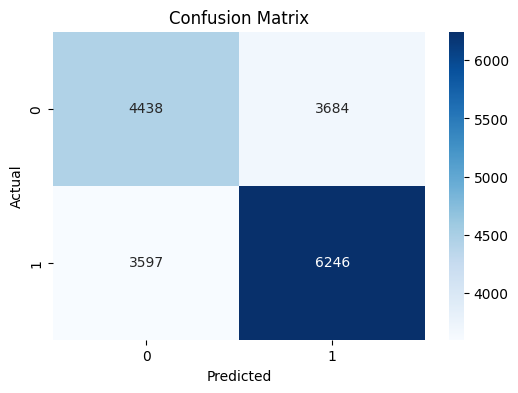

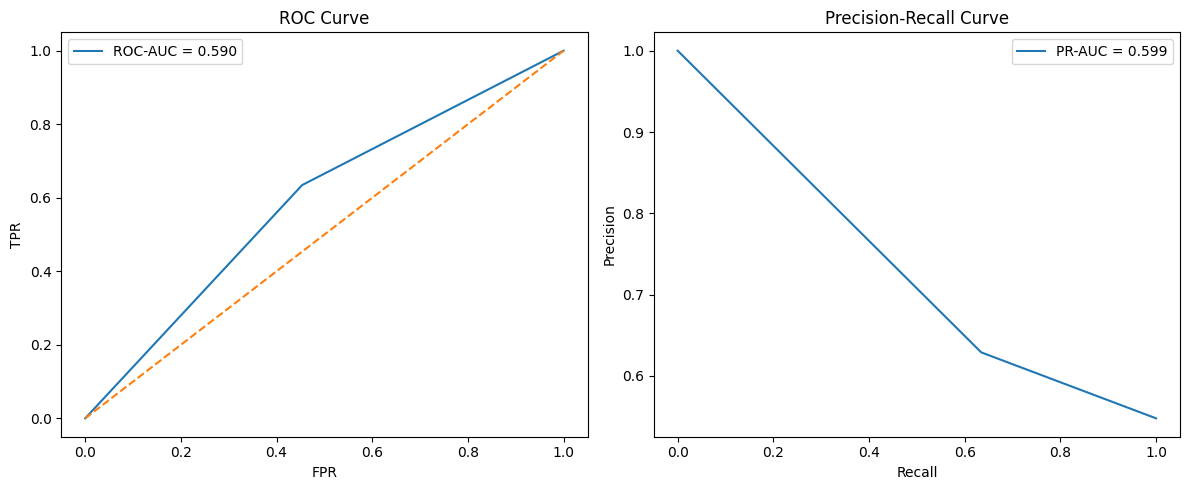

In [49]:
# Î™®Îç∏
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# df = df_merge.copy()

X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, '\n')

# Î™®Îç∏ ÌïôÏäµ
model = DecisionTreeClassifier(random_state=2)
model.fit(X_train, y_train)

# ÏòàÏ∏° Î∞è ÌèâÍ∞Ä
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Î≥ÄÏàòÏ§ëÏöîÎèÑ
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False), '\n')

# ÌòºÎèôÌñâÎ†¨
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# PR-AUC
pr_auc = average_precision_score(y_test, y_prob)
prec, recall, _ = precision_recall_curve(y_test, y_prob)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
axes[0].plot([0,1],[0,1],'--')
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TPR")
axes[0].set_title("ROC Curve")
axes[0].legend()

axes[1].plot(recall, prec, label=f"PR-AUC = {pr_auc:.3f}")
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].set_title("Precision-Recall Curve")
axes[1].legend()

plt.tight_layout()
plt.show()

In [50]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
# df = pd.read_csv(DATA_PATH)
# Ïù¥ÎØ∏ Îç∞Ïù¥ÌÑ∞ Ï†ïÏùòÎê®

# 2. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# print("Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:")
# print(df.head(), "\n")


# Î¨∏ÏûêÏó¥ Ï†ÑÏ≤òÎ¶¨: b'2024' ‚Üí 2024 ÌòïÌÉúÎ°ú Î≥ÄÌôò
# df = df.applymap(lambda x: str(x).replace("b'", "").replace("'", "") if isinstance(x, str) else x)

# Î™®Îì† Ïª¨ÎüºÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (Î≥ÄÌôò Î∂àÍ∞ÄÌïú Í±¥ NaN)
# df = df.apply(pd.to_numeric, errors='coerce')


# 3. ÎèÖÎ¶ΩÎ≥ÄÏàò(X), Ï¢ÖÏÜçÎ≥ÄÏàò(y) Î∂ÑÎ¶¨
# üîπ ÎßàÏßÄÎßâ Ïª¨ÎüºÏù¥ ÌÉÄÍπÉ(y)Ïù¥ÎùºÍ≥† Í∞ÄÏ†ïÌï©ÎãàÎã§. ÎßåÏïΩ Îã§Î•¥Î©¥ ÏàòÏ†ïÌï¥Ï£ºÏÑ∏Ïöî.
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]

# 4. ÌïôÏäµÏö©/ÌÖåÏä§Ìä∏Ïö© Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 5. ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÌïôÏäµ
rf_clf = RandomForestClassifier(
    random_state=2, 
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,                            )
rf_clf.fit(X_train, y_train)

# 6. ÏòàÏ∏°
y_pred = rf_clf.predict(X_test)

# 7. ÌèâÍ∞ÄÏßÄÌëú Í≥ÑÏÇ∞
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# 8. Í≤∞Í≥º Ï∂úÎ†•
print("‚úÖ RandomForestClassifier ÌèâÍ∞Ä Í≤∞Í≥º")

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")
print("\nÏÑ∏Î∂Ä Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:")
print(classification_report(y_test, y_pred))


‚úÖ RandomForestClassifier ÌèâÍ∞Ä Í≤∞Í≥º
Accuracy : 0.6905
Precision: 0.6894
Recall   : 0.6905
F1-Score : 0.6895

ÏÑ∏Î∂Ä Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65      8122
           1       0.71      0.74      0.72      9843

    accuracy                           0.69     17965
   macro avg       0.69      0.69      0.69     17965
weighted avg       0.69      0.69      0.69     17965



Confusion matrix (counts):
 [[8106   16]
 [   4 9839]]
Total samples = 17965, errors = 20


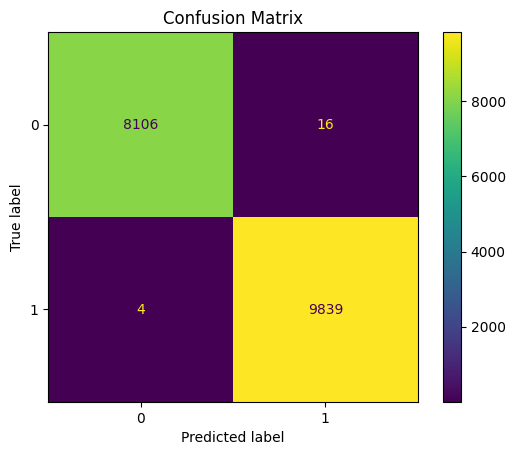

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# ÌòºÎèôÌñâÎ†¨
cm = confusion_matrix(y_test, y_pred)   # y_test, y_predÎäî Ïù¥ÎØ∏ ÏûàÎäî Î≥ÄÏàò
print("Confusion matrix (counts):\n", cm)
total = cm.sum()
errors = total - np.trace(cm)
print(f"Total samples = {total}, errors = {errors}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [37]:
# Ïò§Î∂ÑÎ•ò ÏÉòÌîåÌôïÏù∏
test_df = X_test.copy()
test_df['y_true'] = y_test
test_df['y_pred'] = y_pred
mis = test_df[test_df['y_true'] != test_df['y_pred']]
print("Ïò§Î∂ÑÎ•ò Ïàò:", len(mis))
display(mis.head(20))   # ÏûòÎ™ª Î∂ÑÎ•òÎêú ÏÉòÌîåÏùÑ ÏßÅÏ†ë ÌôïÏù∏


Ïò§Î∂ÑÎ•ò Ïàò: 20


exmprs_no       age sex CTPRVN_CODE SPOT_NO       wt_p  \
26438  2024413170001221712009001 31.000000   1          41   21712 363.538040   
4533   2024111170014937892001804 27.000000   1          11   37892 666.177500   
45823  2024423270009103961000803 26.000000   1          42   03961  44.821120   
33000  2024413170030600711004003 63.000000   1          41   00711 137.761900   
397    2024111170002513981001804 26.000000   1          11   13981 689.452450   
4268   2024111170014902992004203 26.000000   1          11   02992 752.713640   
36766  2024413170042008692002001 30.000000   1          41   08692 237.864020   
58750  2024443470020006522008201 50.000000   2          44   06522  66.618300   
54044  2024433370012522351003301 22.000000   2          43   22351 303.787300   
32220  2024413170028402001001201 31.000000   1          41   02001 304.017370   
77462  2024473770027830252001403 44.000000   1          47   30252 323.507280   
26541  2024413170002106872002102 57.000000   1          41   06872 501.181790   
5087   2024111170016513731001101 19.000000   1          11   13731 559.020220   
44562  2024423270004100541001902 22.000000   2          42   00541  41.563650   
35179  2024413170038104042000201 31.000000   1          41   04042 220.769360   
27495  2024413170004724751006601 37.000000   1          41   24751 301.485440   
72869  2024473770002217281004301 49.000000   1          47   17281 232.435660   
80799  2024473777003900042007801 33.000000   1          47   00042  27.848020   
381    2024111170002511792002801 21.000000   2          11   11792 950.860050   
40738  2024413170055122722003102 25.000000   1          41   22722 466.151810   

       mbhld_co  reside_adult_co  fma_04z1  fma_24z2  nue_01z1  nua_01z2  \
26438  2.000000         2.000000  3.000000       NaN  1.000000  1.000000   
4533   4.000000         4.000000  3.000000       NaN  1.000000  4.000000   
45823  6.000000         5.000000  3.000000       NaN  1.000000  4.000000   
33000  3.000000         3.000000  3.000000       NaN  1.000000  1.000000   
397    4.000000         4.000000  3.000000       NaN  1.000000  1.000000   
4268   5.000000         5.000000  3.000000       NaN  1.000000  3.000000   
36766  2.000000         2.000000  3.000000       NaN  1.000000  1.000000   
58750  1.000000         1.000000  3.000000       NaN  1.000000  1.000000   
54044  1.000000         1.000000  3.000000       NaN  1.000000  4.000000   
32220  1.000000         1.000000  3.000000       NaN  1.000000  3.000000   
77462  3.000000         3.000000  3.000000       NaN  2.000000  1.000000   
26541  4.000000         4.000000  3.000000       NaN  1.000000  1.000000   
5087   1.000000         1.000000  3.000000       NaN  1.000000  1.000000   
44562  4.000000         4.000000  3.000000       NaN  1.000000  4.000000   
35179  2.000000         2.000000  3.000000       NaN  1.000000  4.000000   
27495  1.000000         1.000000  3.000000       NaN  1.000000  4.000000   
72869  1.000000         1.000000  1.000000       NaN  3.000000  1.000000   
80799  2.000000         2.000000  3.000000       NaN  1.000000  4.000000   
381    3.000000         2.000000  1.000000       NaN  1.000000  4.000000   
40738  2.000000         2.000000  3.000000       NaN  1.000000  3.000000   

       nuc_02z1  nuc_03z1  obb_02a1  obb_02b1  obb_02d1  ora_01z1  orb_01z1  \
26438  1.000000  1.000000  1.000000  2.000000  2.000000  2.000000  5.000000   
4533   1.000000       NaN  1.000000  2.000000  2.000000  3.000000  4.000000   
45823  2.000000       NaN  1.000000  2.000000  2.000000  4.000000  5.000000   
33000  1.000000       NaN  1.000000  2.000000  2.000000  3.000000  4.000000   
397    1.000000  1.000000  1.000000  2.000000  2.000000  3.000000  4.000000   
4268   1.000000  1.000000       NaN       NaN       NaN  4.000000  3.000000   
36766  1.000000  1.000000  1.000000  2.000000  2.000000  2.000000  4.000000   
58750  1.000000  1.000000  1.000000  2.000000  2.000000  3.000000  4.000000   
54044  1.0000

In [38]:
# train, test Ï§ëÎ≥µÏó¨Î∂Ä ÌôïÏù∏
# Î∞©Î≤ï A: Ïù∏Îç±Ïä§ Í≤πÏπ® Í≤ÄÏÇ¨ (Í∞ÑÎã®)
common_idx = set(X_train.index).intersection(set(X_test.index))
print("Í∞ôÏùÄ Ïù∏Îç±Ïä§Í∞Ä train/testÏóê ÏûàÎäî Í≤ΩÏö∞ Ïàò:", len(common_idx))

# Î∞©Î≤ï B: Í∞í ÏûêÏ≤¥Í∞Ä ÎèôÏùºÌïú ÌñâÏù¥ trainÍ≥º testÏóê ÏûàÎäîÏßÄ (Î™®Îì† feature Í∏∞Ï§Ä merge)
common = pd.merge(X_test.reset_index(), X_train.reset_index(), on=list(X.columns), how='inner')
print("trainÍ≥º testÏóê ÎèôÏùºÌïú feature Í∞íÏùÑ Í∞ÄÏßÑ Ìñâ Ïàò (ÏôÑÏ†Ñ Ï§ëÎ≥µ):", common.shape[0])


Í∞ôÏùÄ Ïù∏Îç±Ïä§Í∞Ä train/testÏóê ÏûàÎäî Í≤ΩÏö∞ Ïàò:

 0
trainÍ≥º testÏóê ÎèôÏùºÌïú feature Í∞íÏùÑ Í∞ÄÏßÑ Ìñâ Ïàò (ÏôÑÏ†Ñ Ï§ëÎ≥µ): 0


In [39]:
# targetÍ≥º Í∞ïÌïú ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º Í∞ÄÏßÑ featureÌôïÏù∏
df_all = pd.concat([X, y.rename('target')], axis=1)
corrs = df_all.corr()['target'].abs().sort_values(ascending=False)
print(corrs.head(20))   # ÌÉÄÍπÉÍ≥º Ï†àÎåÄ ÏÉÅÍ¥ÄÎèÑÍ∞Ä ÎÜíÏùÄ ÌîºÏ≤ò ÌôïÏù∏


target              1.000000
smd_02z3            0.963292
smb_01z1            0.855602
sma_36z1            0.320324
age                 0.292371
age_group           0.288582
smb_09z1            0.285593
nua_01z2            0.236455
sod_02z3            0.220702
drb_03z1            0.209135
sma_08z1            0.179870
mtc_12c1            0.171120
smc_09z2            0.152989
drb_01z3            0.150691
mtj_11z1            0.145926
smc_10z2            0.135667
sma_01z1            0.135620
edit_mtc_03z1       0.135595
mta_01z1            0.135381
drb_binge_monthly   0.128451
Name: target, dtype: float64


In [40]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# ÍµêÏ∞®Í≤ÄÏ¶ù
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
clf = RandomForestClassifier(random_state=2)
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
print("5-fold CV accuracies:", scores)
print("CV mean:", scores.mean(), "std:", scores.std())
# ÎûúÎç§ÌïòÍ≤å ÎÇòÎàà Îã§Î•∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎèÑ ÎπÑÏä∑Ìïú Í≤∞Í≥ºÎ•º ÎÇº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå


5-fold CV accuracies: [0.99910938 0.99949903 0.999332   0.99927633 0.99922066]
CV mean: 0.9992874793096723 std: 0.00012887361728809024


In [41]:
# feature_importances_
importances = pd.Series(rf_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(20))

# permutation importance (Îçî Ïã†Î¢∞ÏÑ± ÏûàÎäî Î∞©Î≤ï)
from sklearn.inspection import permutation_importance
res = permutation_importance(rf_clf, X_test, y_test, n_repeats=10, random_state=2, n_jobs=-1)
perm_imp = pd.Series(res.importances_mean, index=X.columns).sort_values(ascending=False)
print(perm_imp.head(20))


smd_02z3    0.156793
smb_06z1    0.148307
smd_01z3    0.128717
smb_05z1    0.128426
smb_09z1    0.124908
smb_04z1    0.112115
smb_01z1    0.108078
smb_11z1    0.029860
sma_36z1    0.017114
age_group   0.006420
age         0.005379
smb_03z1    0.004614
sma_11z2    0.004384
sma_08z1    0.003882
smb_12z1    0.002932
nua_01z2    0.002737
smb_13z1    0.002310
smb_02z1    0.001946
sod_02z3    0.001718
sma_01z1    0.001394
dtype: float64
smb_11z1          0.008016
sma_36z1          0.003858
smd_02z3          0.000768
smb_13z1          0.000724
smb_12z1          0.000601
sma_08z1          0.000173
smd_01z3          0.000156
sma_11z2          0.000045
exmprs_no         0.000000
smf_01z1          0.000000
mtj_11z1          0.000000
mtj_10z1          0.000000
fma_04z1          0.000000
mbhld_co          0.000000
reside_adult_co   0.000000
CTPRVN_CODE       0.000000
sex               0.000000
fma_24z2          0.000000
nue_01z1          0.000000
nua_01z2          0.000000
dtype: float64


In [42]:
from sklearn.metrics import roc_auc_score, roc_curve
# ROC-AUC
y_prob = rf_clf.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)
# ROC-AUC = 1Ïóê Îß§Ïö∞ Í∑ºÏ†ë


ROC AUC: 0.9999761085286223
